# Snapchat Political Ads
* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See Project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    * Predict the reach (number of views) of an ad.
    * Predict how much was spent on an ad.
    * Predict the target group of an ad. (For example, predict the target gender.)
    * Predict the (type of) organization/advertiser behind an ad.

Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

# Summary of Findings


### Introduction
My question was: are we able to predict how much as spent on an ad given our dataset? I chose this question because often times, the total amount spent on an online advertisement is calculated after the advertisement runs, as the cost per impression constantly changes based on user interaction (e.g. an ad that goes viral would have a cheaper cost per impression than one that doesn't, as those are 'natural' impressions, which shows that the marketing/ad is done right!). This would be a regression problem, as we are trying to predict a continuous numerical value, and I chose the Spend variable as my target variable, as we will be attempting to predict how much was spent on an ad. 

### Baseline Model
For my Baseline Model, I did not take out any columns nor did I feature engineer any columns. I determined one column that we are using to be quantitative (Impressions), and the remaining 25 columns I deemed as nominal, as none of them had a significant interval ordering to be considered ordinal. For my categorical data, I imputed values with 'NULL', and for numerical data, I imputed them with 0. Overall, I achieved a score on my overall data around 0.85, a 0.88 on training data, and a score of 0.68 on my testing data. Although I don't think this was too bad of a model, I've found that when I ran it multiple times, my scores would vary greatly. My RSME Value was around 4475. Often, my data would overfit the training data and be a poor fit on the testing data; again, this varied greatly for each iteration, so I wanted to improve my model to make it more consist in the accuracy of its predictions. After attempting this 100 times, my test scores ranged from under -0.2 to close to 1.0.


### Final Model
One of the features I added was looking at the total time that an ad ran - I chose to look at this because the time that an ad ran would probably be correlated to it's Spend, eg: it makes sense that an ad that ran longer would cost more than an ad that ran for a short amount of time. Moreover, although I don't know Snapchat's algorithm for determining the Spend of an advertisement, typically a social media ad that runs for a long time but does not get any clicks/impressions would probably cost a lot more than an ad that runs for the same amount of time but gets a lot of impressions. 
Another feature I added was to count the number of codes that the ad was targeted to. Similarly, an ad that was targeted to one or two zipcodes might not receive high impressions as one that was targeted to multiple; or maybe an ad was targeted to one or two zipcodes but it was poorly targetted (eg: a Liberal ad targetted to a historically Conservative area). I changed the column 'Targeting Geo - Postal Code' to instead a numerical column that contained the amount of postal codes the ad was targeted toward. 
Lastly, I decided to look at the Age Groups. I took the age bracket and split it into two columns and combined them again to a numerical column that contained the age range that it combined. According to Snapchat's website, only 4% of ads are targetted toward those 56+, so I decided to cap it at 55. (eg, an 18+ targetted ad was converted to 55 minus 18 = 37). Similarly, if the advertisement was not targetted to an age group, it would be targeted to those who are 13 at youngest (according to Snapchats rules and regulations for users). Although I understand only 18+ individuals can vote, certain ads might have been targetted more toward upcoming voters (16-17 year olds). I was unsure about this column as well: if the ad was targetted toward 18-25 age bracket, it was converted to the age range of 7, if it was targeted toward 45-52, it would've been 7 as well. Changing this column might not have helped completely, as it makes sense for an ad targeted toward 18-25 to have more impact that one targetted to 45-52 year olds (knowing Snapchat's user demographics). However, I thought I'd give it a try. :) 
I dropped the ADID and Creative URL column, as each ad has it's own unique column so I dont think it would have been helpful to keep them as they were. 

Finally, I removed the outliers from the numerical columns. 
This time, I imputed numerical columns with the mean, as it doesn't make sense for some null columns (eg: Total Time it ran, to be 0, which it was in the baseline model). I also used Principal Component Analysis into the categorical pipeline for dimensionality reduction. Because overfitting was an issue in my baseline model, I thought this would be helpful in removing redundant features.

First Model: Linear Regression: RMSE was 167, much better than over 4000 on my baseline model. The score was 0.8 on the test set; for RandomForestRegressor I received a score of 0.82 on the test set with an RMSE of 164.08, for KNNRegressor, I received a score of 0.68 with an RMSE of 216 and using XGradientBoost I got a score of 0.83 on the test set with an RMSE of 157. I've found that after multiple iterations of each, they were fairly similar and consistent in their RMSE, but that the XBGRegressor performed slightly better than the rest. 

### Fairness Evaluation
I decided to evaluate my model for fairness depending on whether the ads were run on the US or outside of the US, to see if maybe there are different costs depending on where the ad is located (maybe Snapchat charges certain countries more for where the ads are from). 
I split it into two groups: 0 for not in the US, and 1 for in the US and performed a permutation test for 500 repetitions to determine whether the means of the predictions were fair/unfair depending on the country. With a pvalue of 0.49, we failed to reject the null hypothesis, and can determine that the predictions are fair for whether or not the ads are US based. For this test I utilized Mean Absolute Error, because RMSE would decay the positive/negative differences and not take them into account. 
By failing to reject the null hypothesis, we can say that this model is not biased on the variable of whether or not the ad is run in the country.
However, this is not saying that my model is not biased. There is just an indication that there is no bias in this specific variable. 

# Code

In [123]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
import re
import xgboost as xgb

In [124]:
ads2018 = os.path.join('PA2018', 'PoliticalAds.csv')
ads2019 = os.path.join('PA2019', 'PoliticalAds.csv')
df2018 = pd.read_csv(ads2018)
df2019 = pd.read_csv(ads2019)
polads = pd.concat([df2018, df2019], ignore_index = True)

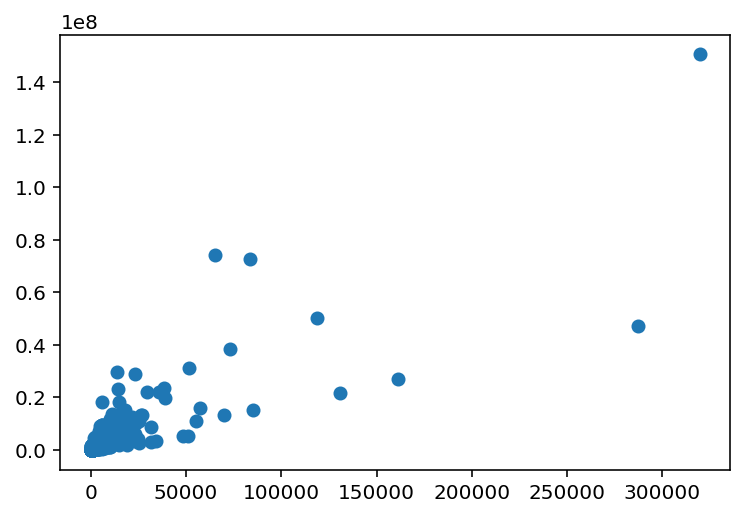

In [125]:
plt.scatter(polads['Spend'], polads['Impressions'])
#plot two numerical columns, look for outliers

In [126]:
polads.head()

,ADID,CreativeUrl,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,...,Interests,OsType,Segments,LocationType,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),Targeting Geo - Postal Code,CreativeProperties
0,91db2796a80472ed8c2bfa17760b3ce1471f6ec1f3147b...,https://www.snap.com/political-ads/asset/b2c47...,1044,137185,2018/10/30 17:45:51Z,2018/11/07 00:00:00Z,"GMMB, Inc","3050 K Street,Washington,20007,US",NaN,JB for Governor,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://iwillvote.com/?state=il
1,97e3f17d5ec164c454a35d2822734482ca60be3f3af310...,https://www.snap.com/political-ads/asset/affc7...,279,94161,2018/12/23 14:26:52Z,2018/12/28 14:28:06Z,Revolution Messaging,"1730 Rhode Island Ave NW,Washington,20036,US",NaN,Paid for by ReBuild USA,...,"Arts & Culture Mavens,Chat Fiction Enthusiasts...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://rebuildusa.info/landing-3
2,14535fea019a9b1a910a77ce1555af8bdedbb5c78fb60a...,https://www.snap.com/political-ads/asset/754f6...,6743,3149886,2018/10/06 01:11:41Z,2018/11/07 03:00:00Z,Lockwood Strategy,US,NaN,Change Now,...,"TV Live Event Viewers (The Academy Awards),TV ...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://action.socalhealthcarecoa...
3,10b64550ad4a23c651d7883746cabeac93cbd92d5f3b3f...,https://www.snap.com/political-ads/asset/818ae...,3698,573475,2018/11/02 16:20:57Z,2018/11/06 18:15:30Z,The Prosper Group,"435 E. Main,Greenwood,46143,US",NaN,No On L,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,"92801,92802,92803,92804,92805,92806,92807,9280...",web_view_url:https://www.stopmeasurel.com
4,2438786c60ae41cf56614885b415a72857bbfb5c06f760...,https://www.snap.com/political-ads/asset/2c264...,445,232906,2018/11/27 21:44:19Z,2019/01/13 21:43:53Z,Amnesty International UK,"17-25 New Inn Yard,London,EC2A 3EA,GB",NaN,Amnesty International UK,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://www.amnesty.org.uk/write-...


In [127]:
len(polads.columns)

27

In [128]:
numcols = ['Impressions'] #numerical columns

In [129]:
catcols = ['ADID', 'CreativeUrl' ,'OrganizationName', 'StartDate', 'EndDate', 'CandidateBallotInformation', 'PayingAdvertiserName', 
           'Gender', 'AgeBracket', 'CountryCode', 'RegionID', 'ElectoralDistrictID', 
          'LatLongRad', 'MetroID', 'Interests', 'OsType', 'Segments', 'LocationType', 
          'Language', 'AdvancedDemographics', 'Targeting Connection Type', 'Targeting Carrier (ISP)', 'Targeting Geo - Postal Code',
       'CreativeProperties'] #categorical columns

In [130]:
basedf = polads.copy()
basedf.isna().sum()/len(basedf)
#find the percent amount of null in each column

ADID                           0.000000
CreativeUrl                    0.000000
Spend                          0.000000
Impressions                    0.000000
StartDate                      0.000000
EndDate                        0.198607
OrganizationName               0.000000
BillingAddress                 0.000000
CandidateBallotInformation     0.931880
PayingAdvertiserName           0.000000
Gender                         0.902513
AgeBracket                     0.082955
CountryCode                    0.000000
RegionID                       0.693309
ElectoralDistrictID            0.980321
LatLongRad                     1.000000
MetroID                        0.945504
Interests                      0.762035
OsType                         0.993642
Segments                       0.337269
LocationType                   0.994550
Language                       0.723282
AdvancedDemographics           0.970936
Targeting Connection Type      1.000000
Targeting Carrier (ISP)        1.000000


In [131]:
basedfcopy = basedf.copy() 

### Baseline Model

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [133]:
basedfcopy.dtypes

ADID                            object
CreativeUrl                     object
Spend                            int64
Impressions                      int64
StartDate                       object
EndDate                         object
OrganizationName                object
BillingAddress                  object
CandidateBallotInformation      object
PayingAdvertiserName            object
Gender                          object
AgeBracket                      object
CountryCode                     object
RegionID                        object
ElectoralDistrictID             object
LatLongRad                     float64
MetroID                         object
Interests                       object
OsType                          object
Segments                        object
LocationType                    object
Language                        object
AdvancedDemographics            object
Targeting Connection Type      float64
Targeting Carrier (ISP)        float64
Targeting Geo - Postal Co

In [134]:
def baseline_model():
    #impute my categorical columns with Null
    cat_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'constant', 
                                 missing_values = np.NaN)),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore')),
    ])
    #transform the categorical columns and impute 0 into numerical columns
    preproc = ColumnTransformer(transformers = [
        ('cat', cat_transformer, catcols),
        ('num', SimpleImputer(strategy='constant', fill_value=0), numcols)
    ])
    
    pl = Pipeline(steps = [('preprocessor', preproc), ('regressor', LinearRegression())])
    return pl

In [135]:
X = basedfcopy.drop(['Spend'], axis = 1)
y = basedfcopy['Spend']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [136]:
new_model = baseline_model()

In [137]:
new_model.fit(X,y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                           

In [138]:
new_model.fit(X_train,y_train)
y_predictions = new_model.predict(X_test)
loss = np.sqrt(np.sum((y_predictions - y_test)**2))
np.sqrt(mean_squared_error(y_test,abs(y_predictions)))

4036.915253248327

In [139]:
new_model.score(X, y)

0.851987065229538

In [140]:
new_model.score(X_train, y_train) 

0.886652214096843

In [141]:
new_model.score(X_test, y_test)

0.4948687491940773

In [142]:
preds = new_model.predict(X_test)

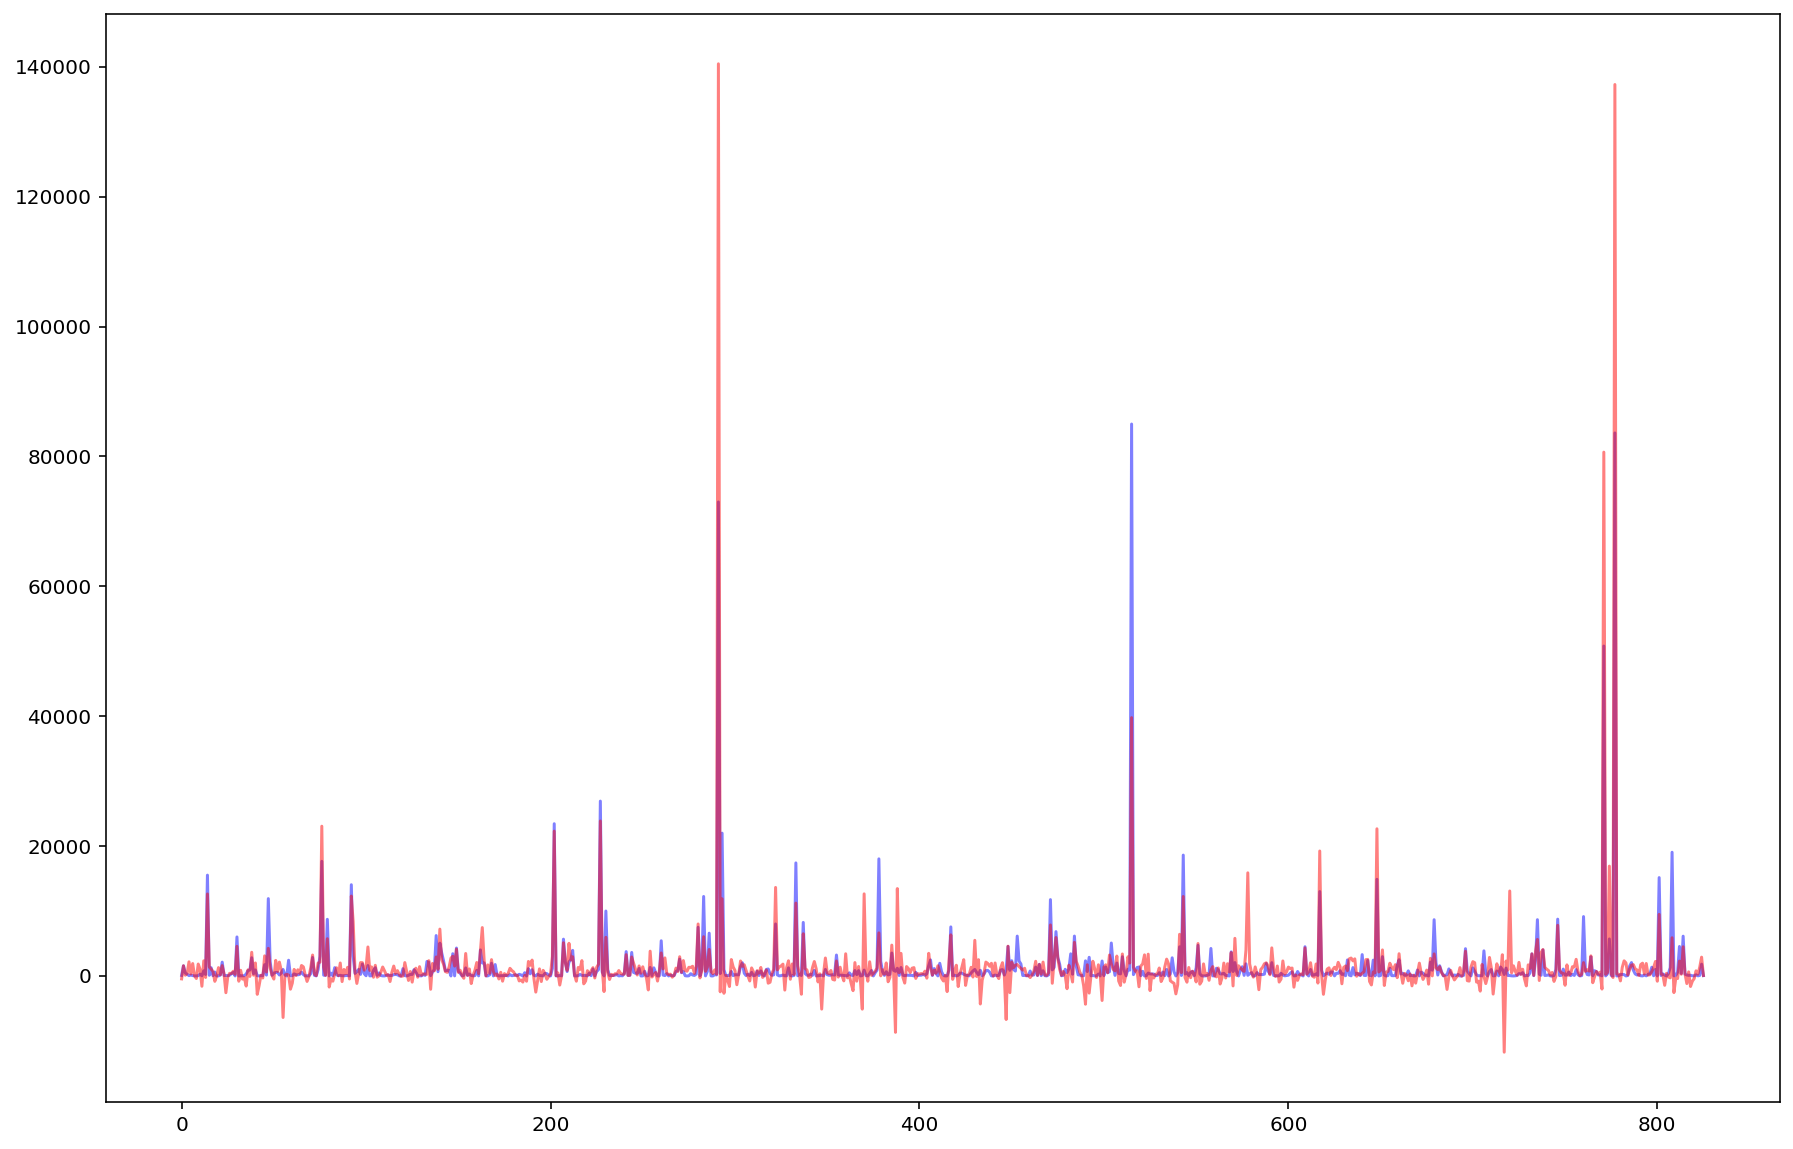

In [143]:
pred_dimensions = (15,10)
fig, ax = pyplot.subplots(figsize = pred_dimensions)
plt.plot(np.arange(0,len(y_test)), y_test, c = 'b', alpha = 0.5)
plt.plot(np.arange(0,len(y_test)), y_predictions, c = 'r', alpha = 0.5)
#plot the predictions against the actual to get a sense of what is happening
#with my predictions

In [74]:
#plotted the range of scores for the test group over 100 iterations - it's a huge range!

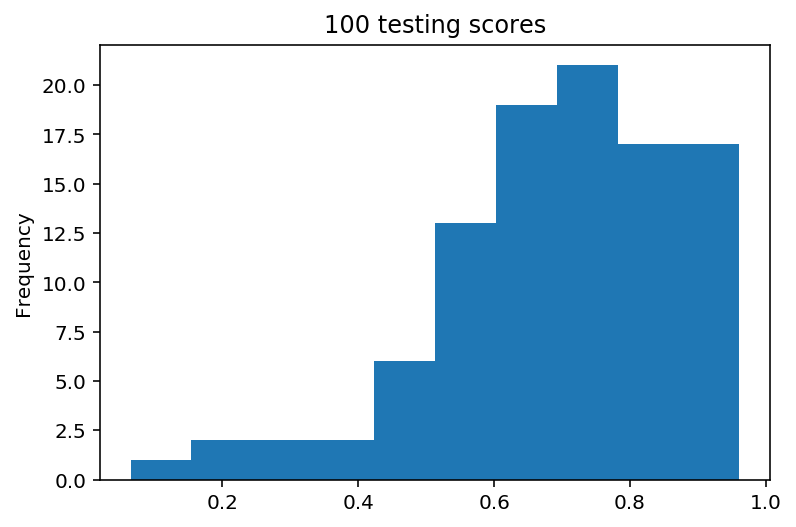

In [66]:
scores = []
for _ in range(100):
    new_model = baseline_model()
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    new_model.fit(X_tr, y_tr)
    scores.append(new_model.score(X_ts, y_ts))


pd.Series(scores).plot(kind='hist', title='100 testing scores')

### Final Model

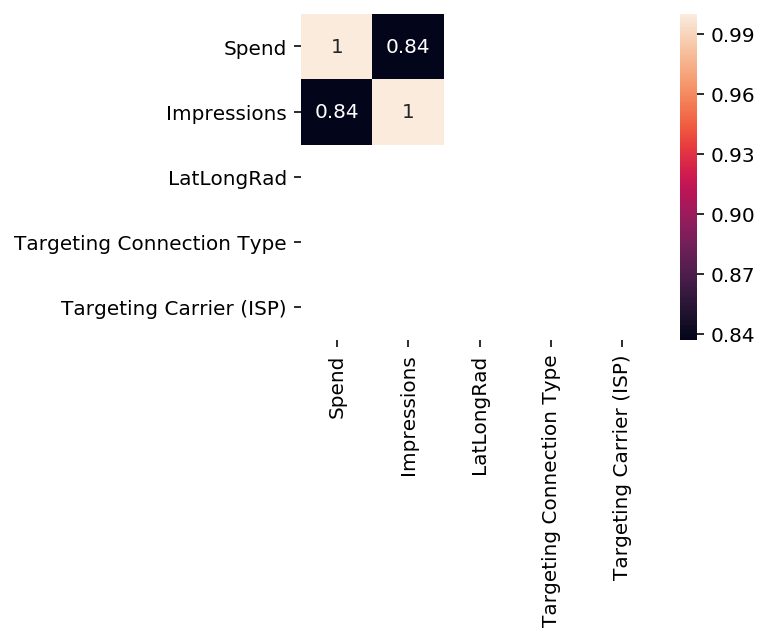

In [144]:
plt.figure(figsize = (4,3))
cor = polads.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [145]:
#plotted some corrections between columns to see which ones to focus on

In [146]:
#feature engineer a new column with the total time spent running the ad
polads['StartDate'] = pd.to_datetime(polads['StartDate'])
polads['EndDate'] = pd.to_datetime(polads['EndDate'])
polads['TotalTime'] = polads['EndDate'] - polads['StartDate']
def timetoint(x):
    return float(x.total_seconds())
polads['TotalTime'] = polads['TotalTime'].apply(timetoint)

In [147]:
polads['Targeting Geo - Postal Code'] = (polads['Targeting Geo - Postal Code']
                                           .transform(func = lambda x: str(x).split(',')))

In [148]:
def findnull(x):
    if x[0] == 'nan':
        return np.NaN
    else:
        return len(x)
#return the number of postal codes the ad was targeted to

In [149]:
polads['NumberofCodes'] = polads['Targeting Geo - Postal Code'].apply(findnull)

In [150]:
polads = polads.drop('Targeting Geo - Postal Code', axis = 1)

In [151]:
polads.isna().sum()/len(polads)
#ADID, CreativeUrl, StartDate, EndDate, Billing Address, 

ADID                          0.000000
CreativeUrl                   0.000000
Spend                         0.000000
Impressions                   0.000000
StartDate                     0.000000
EndDate                       0.198607
OrganizationName              0.000000
BillingAddress                0.000000
CandidateBallotInformation    0.931880
PayingAdvertiserName          0.000000
Gender                        0.902513
AgeBracket                    0.082955
CountryCode                   0.000000
RegionID                      0.693309
ElectoralDistrictID           0.980321
LatLongRad                    1.000000
MetroID                       0.945504
Interests                     0.762035
OsType                        0.993642
Segments                      0.337269
LocationType                  0.994550
Language                      0.723282
AdvancedDemographics          0.970936
Targeting Connection Type     1.000000
Targeting Carrier (ISP)       1.000000
CreativeProperties       

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [153]:
pctnull = polads.isnull().sum()/len(polads)
missing = pctnull[pctnull > 0.95].index
poladscopy = polads.drop(missing, axis = 1)

In [154]:
poladscopy[['B', 'E']] = poladscopy['AgeBracket'].str.split('-', expand = True)
#if there is a range, split into one column with youngest age, oldest age

In [155]:
poladscopy['B'] = poladscopy['B'].fillna('13')
#if there was no youngest age (null) it's targeted to everyone!
#Snapchat's youngest age requirement is 13

In [156]:
def agerange(x):
    y = re.findall('\d+', x)
    return int(y[0])
#get the age and cast it into an int    

In [157]:
poladscopy['B'] = poladscopy['B'].apply(agerange)


In [158]:
poladscopy['E'] = pd.to_numeric(poladscopy['E'].fillna(55))
#if there is no end age range, then fill with 55

In [159]:
poladscopy['AgeBracket'] = poladscopy['E'] - poladscopy['B']
#find the total number of ages that the ad is targeted to

In [160]:
poladscopy = poladscopy.drop(['ADID', 'CreativeUrl', 'StartDate', 'EndDate', 'B', 'E'], axis = 1)


In [161]:
newnum = ['Impressions', 'TotalTime', 'NumberofCodes', 'AgeBracket']
newcat = ['OrganizationName', 'BillingAddress', 'CandidateBallotInformation',
       'PayingAdvertiserName', 'Gender', 'CountryCode', 'RegionID','MetroID',
       'Interests', 'Segments', 'Language', 'CreativeProperties']


In [162]:
Q1 = poladscopy.quantile(0.25)
Q3 = poladscopy.quantile(0.75)
IQR = Q3 - Q1
IQR #finds the IQR for outliers

Spend                756.5
Impressions       302588.5
AgeBracket            25.0
TotalTime        1862075.0
NumberofCodes        390.0
dtype: float64

In [163]:
poladscopy = poladscopy[~((poladscopy < (Q1 - 1.5 * IQR)) |(poladscopy > (Q3 + 1.5 * IQR))).any(axis=1)]

In [164]:
poladscopy.shape

(2629, 17)

In [165]:
def new_model(x): 
    #impute the numerical columns now with the mean, scale the columns
    num_transformer = Pipeline(steps = [
        ('imp', SimpleImputer(strategy = 'mean')),
        ('scaler', pp.StandardScaler())
        ])
    #impute categorical with null, one hot encode the columns, perform
    #PCA to remove redundant columns
    cats = Pipeline([
        ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
        ('pca', PCA(svd_solver='full', n_components=0.99))
    ])
    ct = ColumnTransformer([
        ('numcols', num_transformer, newnum),
        ('catcols', cats, newcat)
    ])

    pl = Pipeline([('feats', ct), ('regression',x)])
    return pl

In [166]:
X1 = poladscopy.drop('Spend', axis = 1)
y1 = poladscopy['Spend']

In [167]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25)


In [168]:
#Linear Regression Model using cleaned data set
pl = new_model(LinearRegression())
pl.fit(X_train1, y_train1)
print('Linear Regression Model')
print ('Score on X,y:', pl.score(X1,y1))
print('Score on X_train1,y_train1:', pl.score(X_train1, y_train1))
print('Score on X_test1, y_test1:', pl.score(X_test1, y_test1))
preds1 = pl.predict(X_test1)
print('RMSE:',np.sqrt(mean_squared_error(y_test1,abs(preds1))))


Linear Regression Model
Score on X,y: 0.8926878703296695
Score on X_train1,y_train1: 0.9296267401122316
Score on X_test1, y_test1: 0.793775934169738
RMSE: 174.6771097267775


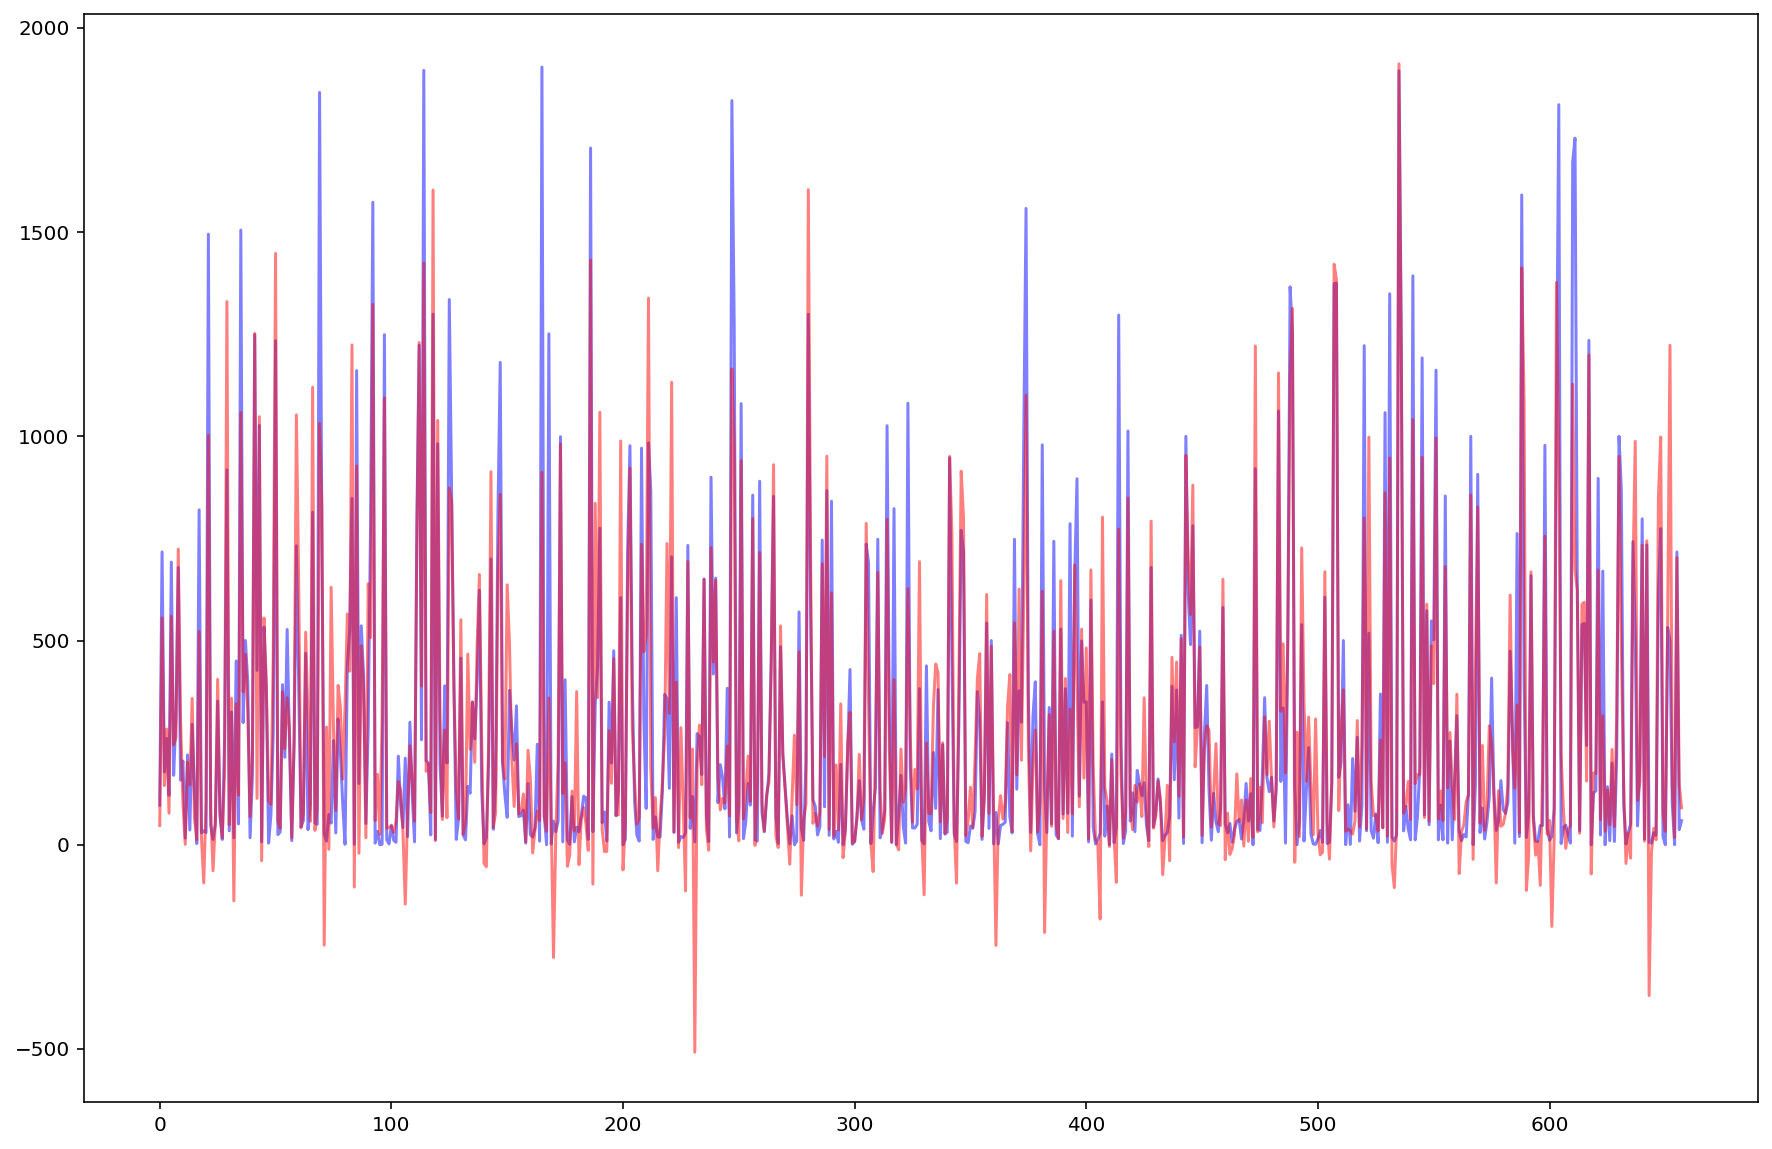

In [169]:
pred_dimensions = (15,10)
fig, ax = pyplot.subplots(figsize = pred_dimensions)
plt.plot(np.arange(0,len(y_test1)), y_test1, c = 'b', alpha = 0.5)
plt.plot(np.arange(0,len(y_test1)), preds1, c = 'r', alpha = 0.5)

In [170]:
#RandomForestRegressor using cleaned data set
pl = new_model(RandomForestRegressor(10))
pl.fit(X_train1, y_train1)
print('RandomForestRegressor Model')
print ('Score on X,y:', pl.score(X1,y1))
print('Score on X_train1,y_train1:', pl.score(X_train1, y_train1))
print('Score on X_test1, y_test1:', pl.score(X_test1, y_test1))
preds1 = pl.predict(X_test1)
print('RMSE:',np.sqrt(mean_squared_error(y_test1,abs(preds1))))


RandomForestRegressor Model
Score on X,y: 0.9263039844999909
Score on X_train1,y_train1: 0.9633897566569583
Score on X_test1, y_test1: 0.8270546863729855
RMSE: 162.9876650282707


In [171]:
#KNNeighbor Regressor using cleaned data set
pl = new_model(neighbors.KNeighborsRegressor(10))
pl.fit(X_train1, y_train1)
print('KNNeighbors Model')
print ('Score on X,y:', pl.score(X1,y1))
print('Score on X_train1,y_train1:', pl.score(X_train1, y_train1))
print('Score on X_test1, y_test1:', pl.score(X_test1, y_test1))
preds1 = pl.predict(X_test1)
print('RMSE:',np.sqrt(mean_squared_error(y_test1,abs(preds1))))


KNNeighbors Model
Score on X,y: 0.7220152505550257
Score on X_train1,y_train1: 0.7358446902861278
Score on X_test1, y_test1: 0.684592687615521
RMSE: 220.10819776510883


In [172]:
#Xgradient Boose on cleaned data set
pl = new_model(xgb.XGBRegressor())
pl.fit(X_train1, y_train1)
print('XGBoostRegressor Model')
print ('Score on X,y:', pl.score(X1,y1))
print('Score on X_train1,y_train1:', pl.score(X_train1, y_train1))
print('Score on X_test1, y_test1:', pl.score(X_test1, y_test1))
preds1 = pl.predict(X_test1)
print('RMSE:',np.sqrt(mean_squared_error(y_test1,abs(preds1))))

/Users/elizabethkim/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:18:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoostRegressor Model
Score on X,y: 0.9088627979163024
Score on X_train1,y_train1: 0.9332958124204624
Score on X_test1, y_test1: 0.8434048783134568
RMSE: 155.0531503828314


### Fairness Evaluation

In [55]:
poladscopy['CountryCode'].value_counts()

united states           1602
norway                   330
canada                   128
united kingdom           121
denmark                   74
netherlands               69
france                    36
finland                   34
kuwait                    34
australia                 28
austria                   27
belgium                   23
switzerland               21
sweden                    19
ireland                   19
india                     16
south africa              10
nigeria                    9
poland                     9
argentina                  6
germany                    4
lithuania                  3
iraq                       1
new zealand                1
puerto rico                1
united arab emirates       1
chile                      1
brazil                     1
turkey                     1
Name: CountryCode, dtype: int64

In [61]:
results = X_test1.copy()
results['prediction'] = preds1
results['actual'] = y_test1
results['in_US'] = (results.CountryCode == 'united states').replace({True: '1', False: '0'})
#if it is in the US, cast as 1 if not is 0

In [203]:
results = results[['prediction', 'actual', 'in_US']]

In [210]:
from sklearn.metrics import mean_absolute_error

In [224]:
def MAE(df):
    mean_error = mean_absolute_error( df['actual'], df['prediction'] )
    return mean_error

results.groupby('in_US').apply(MAE).to_frame()

,0
in_US,
0,89.873311
1,87.830011


In [227]:
results.isna().sum()

prediction    0
actual        0
in_US         0
dtype: int64

In [232]:
def MAE(df):
    mean_error = mean_absolute_error( df['actual'], df['prediction'] )
    return mean_error

n_repetitions = 500

differences = []

for _ in range(n_repetitions):
    shuffled_preds = (
        results['in_US']
        .sample(replace = False, frac = 1)
        .reset_index(drop = True)
    )

    original_and_shuffled = (
        results
        .assign(**{'Shuffled Assignments': shuffled_preds})
    )
    group_means = (
        original_and_shuffled
        .groupby('Shuffled Assignments')
        .apply(MAE)
    )
    
    difference = group_means.diff().iloc[-1]
    differences.append(difference)


In [234]:
observed_difference = (
    results
    .groupby('in_US')
    .apply(rmse)
    .diff()
    .iloc[-1][0])

In [235]:
observed_difference

-0.10838682618845752

In [236]:
np.count_nonzero(differences >= observed_difference) / n_repetitions

0.492

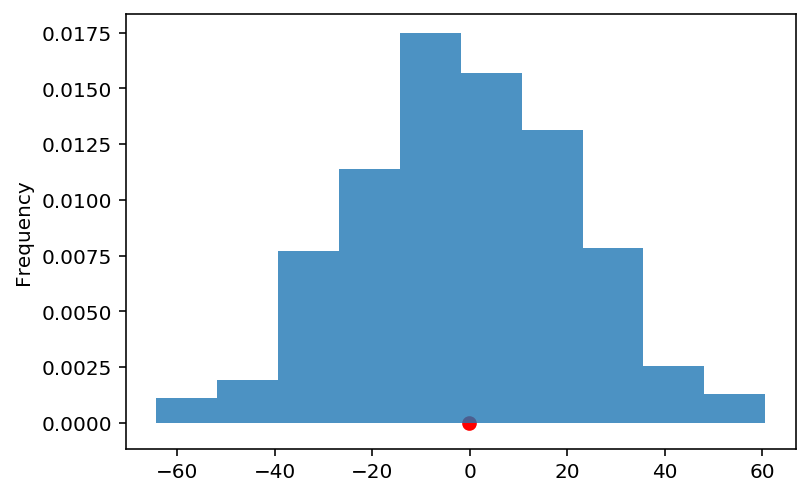

In [237]:
pd.Series(differences).plot(kind = 'hist', density = True, alpha = 0.8)
plt.scatter(observed_difference, 0, color = 'red', s = 40)

In [173]:
#Get the P-value from the hypothesis test, how many differences are 
#greater than the observed difference?
#We fail to reject the null